#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

In [78]:
import pandas as pd
url = "data/titanic.csv"
df = pd.read_csv(url, header=0)
df.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


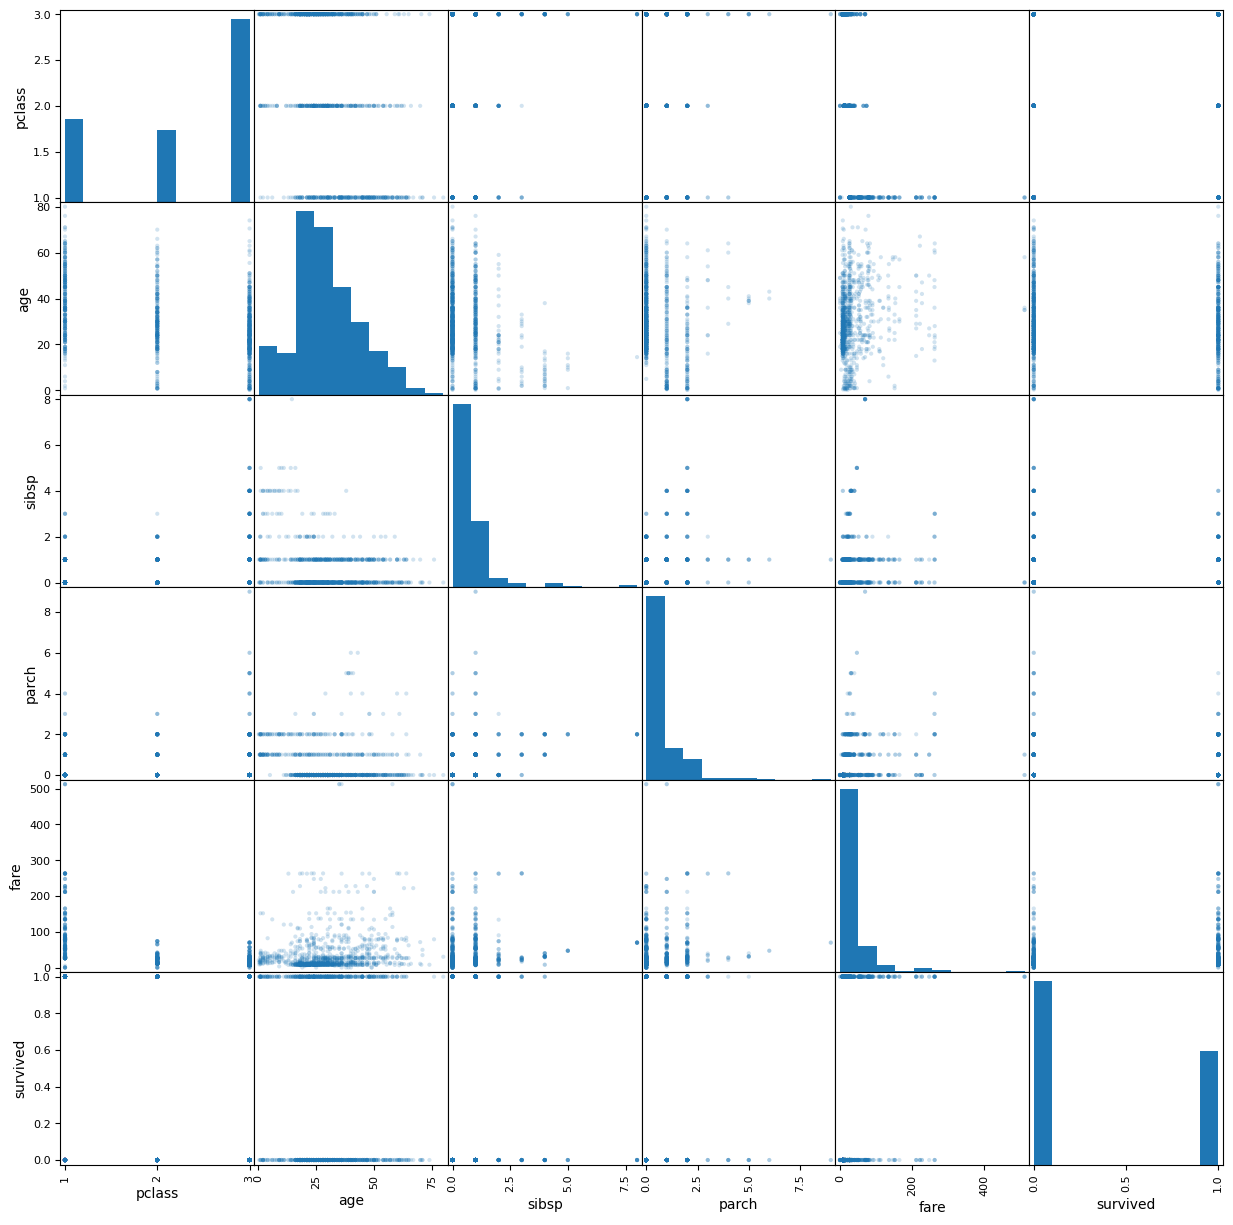

In [79]:
import matplotlib.pyplot as plt
#df.hist()
# Create a scatter plot matrix for continuous data columns
pd.plotting.scatter_matrix(df , alpha=0.2, figsize=(15, 15))
plt.show()

#look for gaps and poor plotting to visualize further

In [80]:
matrix=df.corr(numeric_only=True)
matrix


,pclass,age,sibsp,parch,fare,survived
pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.312469
age,-0.408106,1.000000,-0.243699,-0.150917,0.178739,-0.055513
sibsp,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.027825
parch,0.018322,-0.150917,0.373587,1.000000,0.221539,0.082660
fare,-0.558629,0.178739,0.160238,0.221539,1.000000,0.244265
survived,-0.312469,-0.055513,-0.027825,0.082660,0.244265,1.000000


#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

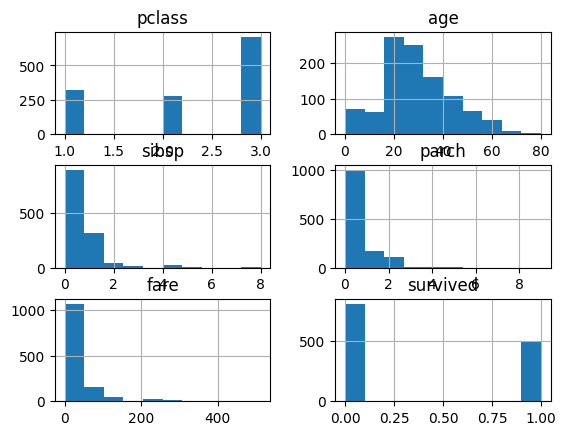

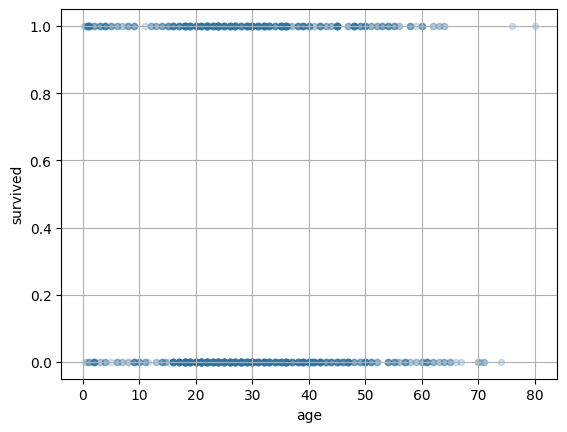

<Axes: xlabel='pclass', ylabel='survived'>

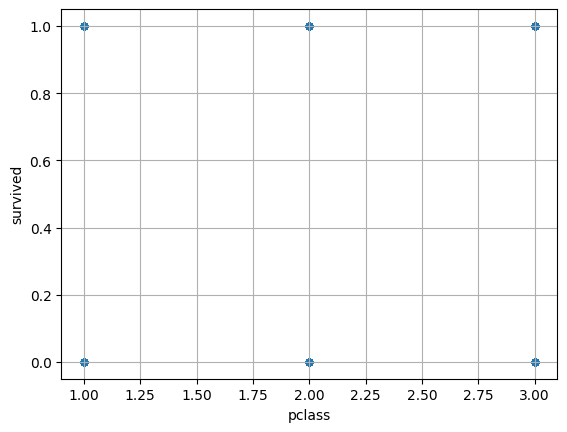

In [81]:
df.hist()
df.plot(kind="scatter", x="age", y="survived", grid=True, alpha=0.2)
plt.show()
df.plot(kind="scatter", x="pclass", y="survived", grid=True)


array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

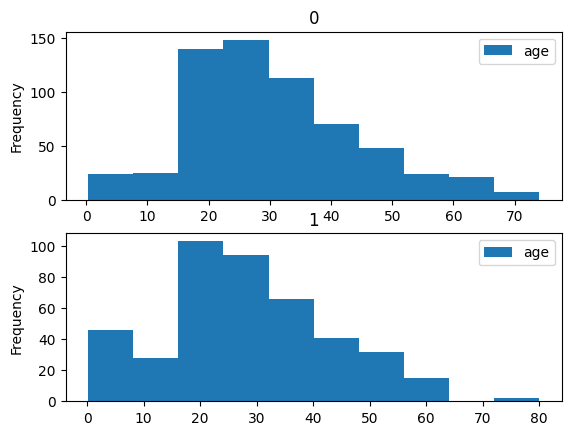

In [82]:

df["age"].unique
df[["age","survived"]].plot.hist(by="survived")

array([<Axes: title={'center': '1'}, ylabel='Frequency'>,
       <Axes: title={'center': '2'}, ylabel='Frequency'>,
       <Axes: title={'center': '3'}, ylabel='Frequency'>], dtype=object)

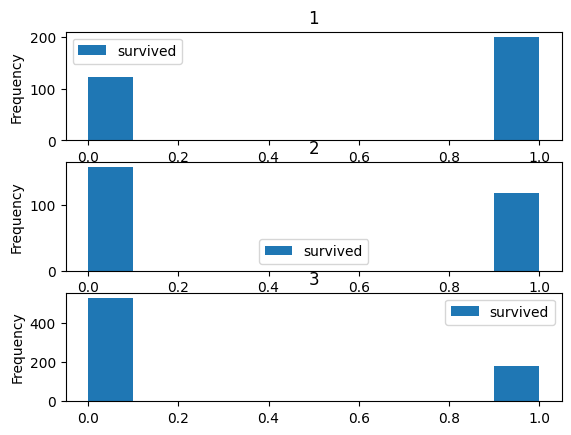

In [83]:

df[["pclass","survived"]].plot.hist(by="pclass")

#### **Exercise 3:**

Examine your data for NAs.  For the features that you think are likely to matter given your initial analysis, use an imputer to fill in the missing values. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.

In [90]:
df.isna().sum()
df.drop(columns=["cabin","embarked"], inplace=True)

KeyError: "['cabin', 'embarked'] not found in axis"

In [87]:
df.isna().sum()


pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
survived      0
dtype: int64

<Axes: >

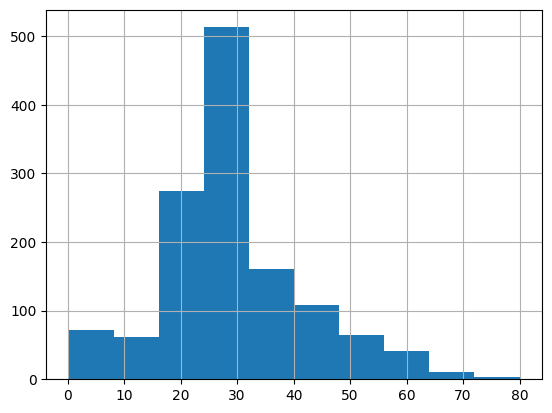

In [88]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X=imputer.fit_transform(df.age.to_numpy().reshape((-1,1)))
df['age']=X[:,0]
df.age.hist()


#### **Exercise 4**

Recall that sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [91]:

df.drop(columns=["name"], inplace= True)
df.info()

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

#housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   object 
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   ticket    1309 non-null   object 
 6   fare      1308 non-null   float64
 7   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [96]:
df_cat=df[["sex"]]
df_cat
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

#### **Exercise 5**

Using 5-fold cross-validation, compare the performance of a LogisticRegression classifier with that of a DecisionTree classifier.

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
lm=LogisticRegression()
X=df[["age","pclass","sibsp","parch"]]
y=df[["survived"]]

result=cross_val_score(lm,X=X,y=y,cv=5)
result

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

array([0.41603053, 0.84351145, 0.73664122, 0.64122137, 0.61302682])

_Note, the following exercises use the housing data introduced in this week's lecture notes._

#### **Exercise 6:** 

Using the housing data introduced with the end-to-end example this week, try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the [documentation](https://scikit-learn.org/stable/modules/svm.html) if you are interested). Use GridSearchCV to explore the parameter space. How does the best `SVR` predictor perform?

#### **Exercise 7:**

Try replacing the `GridSearchCV` with a `RandomizedSearchCV`.

#### **Exercise 8:**

Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes.  Use a `RandomForestRegressor` to drive the feature selection process.